<h1><b>MIDTERM EXAM - CHICAGO CRIMES</b> </h1>
<hr>
<h3>Analyst : Willmyr Kurt M. Verastigue<h3>
<hr>

<h2><b>1. IMPORT NECESSARY LIBRARIES</b></h2>

In [1]:
import numpy as np
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

<hr>
<h2><b>2. CONVERT DATASET TO DATAFRAME</b></h2>
<ul>
    <li>
        <h3>a) Load the Dataset into a Pandas DataFrame</h3>
    </li>
</ul>

In [2]:
crime = pd.read_csv('Datasets\\Chicago_Crimes.csv')

In [3]:
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
crime['Date'] = crime['Date'].astype(str)
crime['Date'] = crime['Date'].replace('/', '-')
crime['Date'] = crime['Date'].str.strip()
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst=True, errors='coerce')

crime['Year'] =  crime['Date'].dt.month
crime['Month'] =  crime['Date'].dt.month
crime['Day'] =  crime['Date'].dt.day
crime['DayOfWeek'] = crime['Date'].dt.dayofweek
crime.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
Month                     0
Day                       0
DayOfWeek                 0
dtype: int64

<hr>
<h2><b>3. CHECK DATAFRAME INFORMATION</b></h2>

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249123 non-null  int64         
 1   Case Number           249123 non-null  object        
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  object        
 4   IUCR                  249123 non-null  object        
 5   Primary Type          249123 non-null  object        
 6   Description           249123 non-null  object        
 7   Location Description  248266 non-null  object        
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  int64         
 12  Ward                  249123 non-null  int64         
 13 

<hr>
<h2><b>4. CHECK BASIC DESCRIPTIVE ANALYTICS</b></h2>

In [6]:
crime.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,249123.0,13586518.893595,28073.0,13523225.0,13615602.0,13708646.0,13810454.0,647319.16141
Date,249123,2024-09-29 02:28:42.947460352,2024-01-05 00:00:00,2024-06-13 01:36:30,2024-09-16 11:19:00,2024-12-28 18:20:00,2025-12-04 00:00:00,NaN
Beat,249123.0,1153.845634,111.0,533.0,1034.0,1732.0,2535.0,707.959752
District,249123.0,11.308924,1.0,5.0,10.0,17.0,31.0,7.074807
Ward,249123.0,23.186823,1.0,10.0,23.0,34.0,50.0,13.925951
Community Area,249120.0,36.23856,1.0,22.0,32.0,53.0,77.0,21.567485
X Coordinate,249033.0,1165309.386716,1092647.0,1153981.0,1167190.0,1176662.0,1205119.0,16168.139632
Y Coordinate,249033.0,1887602.142431,1813897.0,1860560.0,1894278.0,1910282.0,1951517.0,31462.770629
Year,249123.0,6.536936,1.0,4.0,7.0,9.0,12.0,3.362766
Latitude,249033.0,41.847162,41.64459,41.772706,41.865616,41.909711,42.022559,0.086517


<hr>
<h2><b>5. CALL EACH COLUMN INDIVIDUALLY</b></h2>
<ul>
    <li><h3><b> a. Access and print each column separately.</b></h3></li>
</ul>

In [7]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [8]:
crime ['ID']

0         13439321
1         13437420
2         13428676
3         13429357
4         13430098
            ...   
249118    13805239
249119    13804023
249120    13803926
249121    13803475
249122    13804512
Name: ID, Length: 249123, dtype: int64

In [9]:
crime ['ID']

0         13439321
1         13437420
2         13428676
3         13429357
4         13430098
            ...   
249118    13805239
249119    13804023
249120    13803926
249121    13803475
249122    13804512
Name: ID, Length: 249123, dtype: int64

In [10]:
crime ['Case Number']

0         JH237424
1         JH234779
2         JH224478
3         JH225293
4         JH226395
            ...   
249118    JJ217509
249119    JJ215813
249120    JJ215943
249121    JJ215338
249122    JJ216668
Name: Case Number, Length: 249123, dtype: object

In [11]:
crime ['Date']

0        2024-04-14
1        2024-04-14
2        2024-04-14
3        2024-04-14
4        2024-04-14
            ...    
249118   2025-12-04
249119   2025-12-04
249120   2025-12-04
249121   2025-12-04
249122   2025-12-04
Name: Date, Length: 249123, dtype: datetime64[ns]

In [12]:
crime ['Block']

0           040XX S PRAIRIE AVE
1             023XX W CERMAK RD
2           043XX W LE MOYNE ST
3              039XX W ADAMS ST
4              011XX W 112TH PL
                  ...          
249118       029XX W LOGAN BLVD
249119      094XX S HARVARD AVE
249120    084XX S VINCENNES AVE
249121      050XX S ABERDEEN ST
249122      012XX W CARROLL AVE
Name: Block, Length: 249123, dtype: object

In [13]:
crime ['IUCR']

0         0890
1         2825
2         0917
3         143A
4         0890
          ... 
249118    2826
249119    0430
249120    0486
249121    0530
249122    0710
Name: IUCR, Length: 249123, dtype: object

In [14]:
crime ['Primary Type']

0                       THEFT
1               OTHER OFFENSE
2         MOTOR VEHICLE THEFT
3           WEAPONS VIOLATION
4                       THEFT
                 ...         
249118          OTHER OFFENSE
249119                BATTERY
249120                BATTERY
249121                ASSAULT
249122                  THEFT
Name: Primary Type, Length: 249123, dtype: object

In [15]:
crime ['Description']

0                               FROM BUILDING
1                     HARASSMENT BY TELEPHONE
2               CYCLE, SCOOTER, BIKE WITH VIN
3               UNLAWFUL POSSESSION - HANDGUN
4                               FROM BUILDING
                         ...                 
249118         HARASSMENT BY ELECTRONIC MEANS
249119    AGGRAVATED - OTHER DANGEROUS WEAPON
249120                DOMESTIC BATTERY SIMPLE
249121    AGGRAVATED - OTHER DANGEROUS WEAPON
249122               THEFT FROM MOTOR VEHICLE
Name: Description, Length: 249123, dtype: object

In [16]:
crime ['Location Description']

0                            APARTMENT
1         COMMERCIAL / BUSINESS OFFICE
2                               STREET
3                               STREET
4                            RESIDENCE
                      ...             
249118                       APARTMENT
249119                          STREET
249120                       APARTMENT
249121                          STREET
249122                          STREET
Name: Location Description, Length: 249123, dtype: object

In [17]:
crime ['Arrest']

0         False
1         False
2         False
3          True
4         False
          ...  
249118    False
249119    False
249120    False
249121     True
249122    False
Name: Arrest, Length: 249123, dtype: bool

In [18]:
crime ['Domestic']

0         False
1         False
2         False
3         False
4         False
          ...  
249118    False
249119    False
249120     True
249121    False
249122    False
Name: Domestic, Length: 249123, dtype: bool

In [19]:
crime ['Beat']

0          213
1         1034
2         2534
3         1122
4         2234
          ... 
249118    1414
249119     634
249120     622
249121     933
249122    1215
Name: Beat, Length: 249123, dtype: int64

In [20]:
crime ['District']

0          2
1         10
2         25
3         11
4         22
          ..
249118    14
249119     6
249120     6
249121     9
249122    12
Name: District, Length: 249123, dtype: int64

In [21]:
crime ['Ward']

0          3
1         25
2         36
3         28
4         21
          ..
249118     1
249119     9
249120    21
249121    20
249122    27
Name: Ward, Length: 249123, dtype: int64

In [22]:
crime ['Community Area']

0         38.0
1         31.0
2         23.0
3         26.0
4         75.0
          ... 
249118    22.0
249119    49.0
249120    71.0
249121    61.0
249122    28.0
Name: Community Area, Length: 249123, dtype: float64

In [23]:
crime ['FBI Code']

0          06
1          26
2          07
3          15
4          06
         ... 
249118     26
249119    04B
249120    08B
249121    04A
249122     06
Name: FBI Code, Length: 249123, dtype: object

In [24]:
crime ['X Coordinate']

0         1178707.0
1         1161210.0
2         1146960.0
3         1150158.0
4         1170856.0
            ...    
249118    1156478.0
249119    1175694.0
249120    1173850.0
249121    1169838.0
249122    1168216.0
Name: X Coordinate, Length: 249123, dtype: float64

In [25]:
crime ['Y Coordinate']

0         1878256.0
1         1889347.0
2         1909501.0
3         1898721.0
4         1830157.0
            ...    
249118    1917149.0
249119    1842631.0
249120    1848976.0
249121    1871348.0
249122    1902390.0
Name: Y Coordinate, Length: 249123, dtype: float64

In [26]:
crime ['Year']

0          4
1          4
2          4
3          4
4          4
          ..
249118    12
249119    12
249120    12
249121    12
249122    12
Name: Year, Length: 249123, dtype: int32

In [27]:
crime ['Updated On']

0         12/21/2024 03:40:46 PM
1         12/21/2024 03:40:46 PM
2         12/21/2024 03:40:46 PM
3         12/21/2024 03:40:46 PM
4         12/21/2024 03:40:46 PM
                   ...          
249118    04/19/2025 03:41:24 PM
249119    04/19/2025 03:41:24 PM
249120    04/19/2025 03:41:24 PM
249121    04/19/2025 03:41:24 PM
249122    04/19/2025 03:41:24 PM
Name: Updated On, Length: 249123, dtype: object

In [28]:
crime ['Latitude']

0         41.821236
1         41.852052
2         41.907640
3         41.877997
4         41.689421
            ...    
249118    41.928440
249119    41.723545
249120    41.740998
249121    41.802477
249122    41.887694
Name: Latitude, Length: 249123, dtype: float64

In [29]:
crime ['Longitude']

0        -87.619921
1        -87.683801
2        -87.735587
3        -87.724121
4        -87.650123
            ...    
249118   -87.700416
249119   -87.632040
249120   -87.638606
249121   -87.652657
249122   -87.657710
Name: Longitude, Length: 249123, dtype: float64

In [30]:
crime ['Location']

0         (41.821236024, -87.619920712)
1         (41.852051675, -87.683800849)
2         (41.907640473, -87.735587478)
3         (41.877997275, -87.724120826)
4           (41.6894214, -87.650123247)
                      ...              
249118    (41.928439867, -87.700415972)
249119    (41.723545182, -87.632039508)
249120     (41.74099774, -87.638606337)
249121    (41.802477219, -87.652657244)
249122    (41.887694407, -87.657710204)
Name: Location, Length: 249123, dtype: object

<hr>
<h2><b>6. CHECKING FOR NULL VALUES</b></h2>
<ul>
    <li><h3><b>a. Identify missing values using</b></h3></li>
</ul>

In [31]:
crime.isnull().sum

<bound method DataFrame.sum of            ID  Case Number   Date  Block   IUCR  Primary Type  Description  \
0       False        False  False  False  False         False        False   
1       False        False  False  False  False         False        False   
2       False        False  False  False  False         False        False   
3       False        False  False  False  False         False        False   
4       False        False  False  False  False         False        False   
...       ...          ...    ...    ...    ...           ...          ...   
249118  False        False  False  False  False         False        False   
249119  False        False  False  False  False         False        False   
249120  False        False  False  False  False         False        False   
249121  False        False  False  False  False         False        False   
249122  False        False  False  False  False         False        False   

        Location Description  Ar

<hr>
<h2><b>7. FILL NULL VALUES WITH STATISTICAL VALUES</b></h2>

In [32]:
crime["Arrest"] = crime["Arrest"].map({True: "Arrested", False: "Not Arrested"})
crime["Domestic"] = crime["Domestic"].map({True: "Has Violence", False: "Doesn't Have Violence"})
crime['Latitude'] = crime['Latitude'].fillna(crime['Latitude'].mode()[0])
crime['Longitude'] = crime['Longitude'].fillna(crime['Longitude'].mode()[0])
crime['Location Description'] = crime['Location Description'].fillna(crime['Location Description'].mode()[0])
crime['Community Area'] = crime['Community Area'].fillna(crime['Community Area'].mode()[0])
crime['X Coordinate'] = crime['X Coordinate'].fillna(crime['X Coordinate'].mode()[0])
crime['Y Coordinate'] = crime['Y Coordinate'].fillna(crime['Y Coordinate'].mode()[0])
crime['Location'] = crime['Location'].fillna(crime['Location'].mode()[0])
crime['Date'] = crime['Date'].fillna('unacounted')
crime['Updated On'] = crime['Updated On'].fillna('unacounted')

crime.dtypes
crime.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
dtype: int64

<hr>
<h2><b>8. CHECK COLUMN DATA TYPES</b></h2>
<ul>
    <li><h3><b>a. Inspect and adjust data types as needed</b></h3></li>
</ul>

In [33]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [34]:
crime['Case Number'] = crime['Case Number'].astype('category')
crime['Block'] = crime['Block'].astype('category')
crime['IUCR'] = crime['IUCR'].astype('category')
crime['Description'] = crime['Description'].astype('category')
crime['Location Description'] = crime['Location Description'].astype('category')
crime['Arrest'] = crime['Arrest'].astype('category')
crime['Domestic'] = crime['Domestic'].astype('category')
crime['FBI Code'] = crime['FBI Code'].astype('category')
crime['Updated On'] = crime['FBI Code'].astype('category')
crime['Location'] = crime['Location'].astype('category')

In [35]:
crime.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                    object
Description                   category
Location Description          category
Arrest                        category
Domestic                      category
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                    category
Latitude                       float64
Longitude                      float64
Location                      category
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

In [36]:
for i in crime['Location Description'].unique():
    print(i)

APARTMENT
COMMERCIAL / BUSINESS OFFICE
STREET
RESIDENCE
RESIDENCE - PORCH / HALLWAY
RESTAURANT
HOSPITAL BUILDING / GROUNDS
ATHLETIC CLUB
PARKING LOT / GARAGE (NON RESIDENTIAL)
VEHICLE NON-COMMERCIAL
SIDEWALK
OTHER (SPECIFY)
SCHOOL - PUBLIC BUILDING
DRIVEWAY - RESIDENTIAL
BAR OR TAVERN
ALLEY
DRUG STORE
SMALL RETAIL STORE
RESIDENCE - GARAGE
PARK PROPERTY
CONVENIENCE STORE
HOTEL / MOTEL
SCHOOL - PUBLIC GROUNDS
BOAT / WATERCRAFT
CHA PARKING LOT / GROUNDS
POLICE FACILITY / VEHICLE PARKING LOT
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA
AIRPORT PARKING LOT
AIRPORT EXTERIOR - NON-SECURE AREA
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA
BANK
CTA PARKING LOT / GARAGE / OTHER PROPERTY
DEPARTMENT STORE
VACANT LOT / LAND
CHURCH / SYNAGOGUE / PLACE OF WORSHIP
NURSING / RETIREMENT HOME
GAS STATION
RESIDENCE - YARD (FRONT / BACK)
GROCERY FOOD STORE
CTA TRAIN
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA
AIRPORT EXTERIOR - SECURE AREA
CEMETARY
CTA BUS
CTA STATION
CTA PLATFORM
CHA APARTMENT
AIRPORT TER

<h1><b>DATA ANALYTICS : CHICAGO CRIMES</b></h1>

<h2><b>QUESTION #1</b></h2>

<h2><b>Which among the categories of crimes has the highest number of records and the lowest records?</b></h2>
<hr>

<Axes: xlabel='Primary Type'>

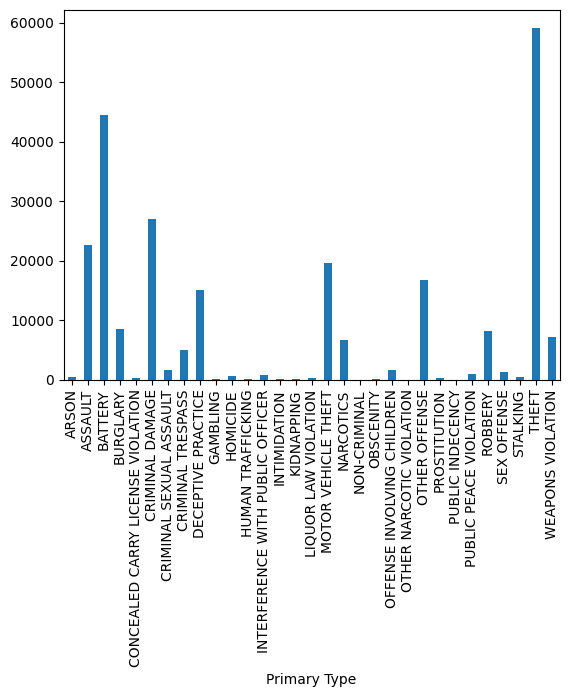

In [37]:
crime.groupby('Primary Type')['ID'].count().plot(kind='bar')

<h3><b>INSIGHTS:</b> </h3>

As presented in the bar chart, the different types of crimes range greatly in the number of recorded cases, from the highest, theft, which has the highest bar, and represents nearly 60,000 cases as the highest, and gambling with human trafficking as the lowest, as they have the shortest bars, each getting far less than 1,000. The following highest category after theft is battery, which has a total of around 45,000 recorded cases.



<hr>
<h2><b>QUESTION #2</b></h2>

<h2><b>Which among the two domestic crimes category has the most highest percentage?</b></h2>
<hr>

<Axes: xlabel='Domestic'>

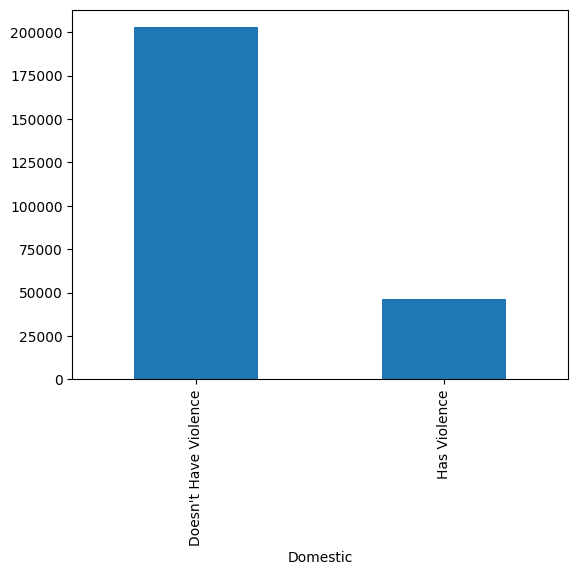

In [38]:
crime.groupby('Domestic')['ID'].count().plot(kind='bar')

<h3><b>INSIGHTS:</b> </h3>

The bar graph makes it clear that there is a significant difference between crimes classified as Doesn't Have Violence and those classified as "Has Violence." The number of violent incidents is about 50,000, or 20%, while the number of non-violent incidents is about 200,000, or 80%.

<hr>
<h2><b>QUESTION #3</b></h2>

<h2><b>Which among the categories of crimes has the highest number of records and the lowest records?</b></h2>
<hr>

In [39]:
crim = crime['Primary Type'].value_counts()
crim

Primary Type
THEFT                                59201
BATTERY                              44579
CRIMINAL DAMAGE                      27094
ASSAULT                              22615
MOTOR VEHICLE THEFT                  19604
OTHER OFFENSE                        16781
DECEPTIVE PRACTICE                   14991
BURGLARY                              8443
ROBBERY                               8200
WEAPONS VIOLATION                     7164
NARCOTICS                             6627
CRIMINAL TRESPASS                     5045
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL SEXUAL ASSAULT               1573
SEX OFFENSE                           1210
PUBLIC PEACE VIOLATION                1006
INTERFERENCE WITH PUBLIC OFFICER       771
HOMICIDE                               553
STALKING                               520
ARSON                                  452
PROSTITUTION                           287
CONCEALED CARRY LICENSE VIOLATION      249
LIQUOR LAW VIOLATION                   19

In [40]:
crim.index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'DECEPTIVE PRACTICE', 'BURGLARY', 'ROBBERY',
       'WEAPONS VIOLATION', 'NARCOTICS', 'CRIMINAL TRESPASS',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'STALKING', 'ARSON', 'PROSTITUTION',
       'CONCEALED CARRY LICENSE VIOLATION', 'LIQUOR LAW VIOLATION',
       'INTIMIDATION', 'KIDNAPPING', 'OBSCENITY', 'HUMAN TRAFFICKING',
       'GAMBLING', 'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL'],
      dtype='object', name='Primary Type')

In [41]:
pd.CategoricalIndex(['THEFT','CRIMINAL DAMAGE','ASSAULT'], categories=['THEFT','CRIMINAL DAMAGE','ASSAULT'],ordered=False,dtype='category',name='Primary Type')

CategoricalIndex(['THEFT', 'CRIMINAL DAMAGE', 'ASSAULT'], categories=['THEFT', 'CRIMINAL DAMAGE', 'ASSAULT'], ordered=False, dtype='category', name='Primary Type')

In [42]:
filtered = crim.loc[['THEFT', 'CRIMINAL DAMAGE', 'ASSAULT']]
filtered

Primary Type
THEFT              59201
CRIMINAL DAMAGE    27094
ASSAULT            22615
Name: count, dtype: int64

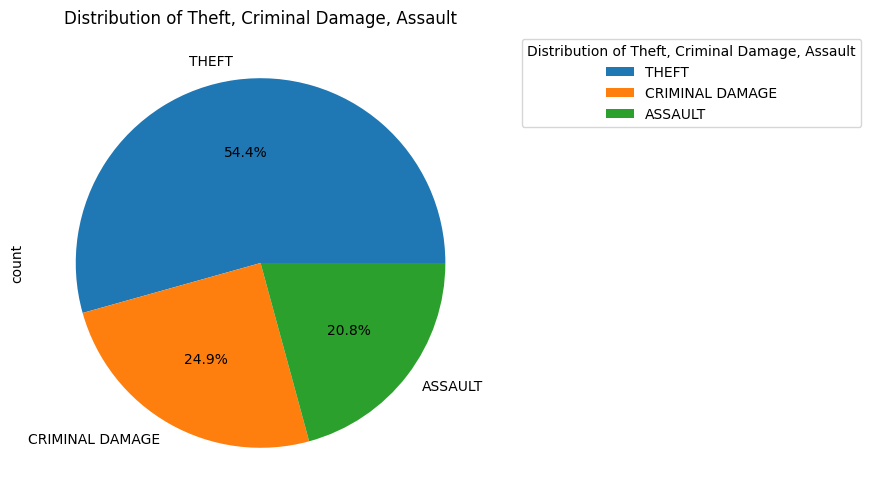

In [43]:
filtered.plot(kind='pie', 
autopct='%1.1f%%', 
figsize=(6,6))
plt.title("Distribution of Theft, Criminal Damage, Assault")
plt.legend(title='Distribution of Theft, Criminal Damage, Assault', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3><b>INSIGHTS:</b> </h3>

It is evident from the pie chart that Theft records the largest single value at 54.4% of all incidents. When combined with Criminal Damage, 24.9%, these two property-related, non-violent offenses account for a total of 79.3% of the total filtered incidents (the sum of 54.4% plus 24.9%). This large majority almost four out of five crimes in this selection clearly indicates that property crimes are the overwhelming concern in the obtained data, significantly more than the person-related crime, Assault (20.8%).

<hr>
<h2><b>QUESTION #4</b></h2>

<h2><b>"What is the yearly crime for the Hospital Building/Grounds over the 12-year timeframe shown?</b></h2>
<hr>

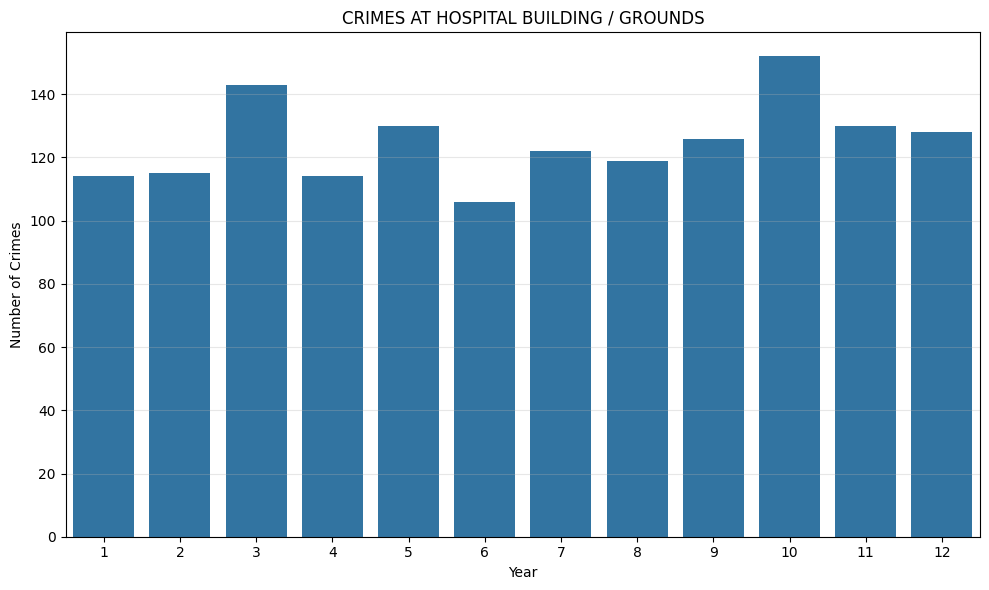

In [44]:
hosgro_data = crime[crime['Location Description'] == 'HOSPITAL BUILDING / GROUNDS']

yearly_hosgro_totals = hosgro_data.groupby('Year').size().reset_index(name='Accidents')

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_hosgro_totals, x='Year', y='Accidents')
plt.title('CRIMES AT HOSPITAL BUILDING / GROUNDS')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The data shows a troubling trend: crime on the hospital grounds, while variable, has been consistently high since Year 9-September, peaking at about 150 incidents in Year 10-October. This signals an elevated, dangerous risk profile that requires immediate action, as security measures implemented since Year 9 are clearly not keeping the number of incidents down to the safer baseline achieved earlier.

<hr>
<h2><b>QUESTION #5</b></h2>

<h2><b>Which among the consecutive months see the highest combined percentage of crime?Describe all the crimes categories.</b></h2>
<hr>

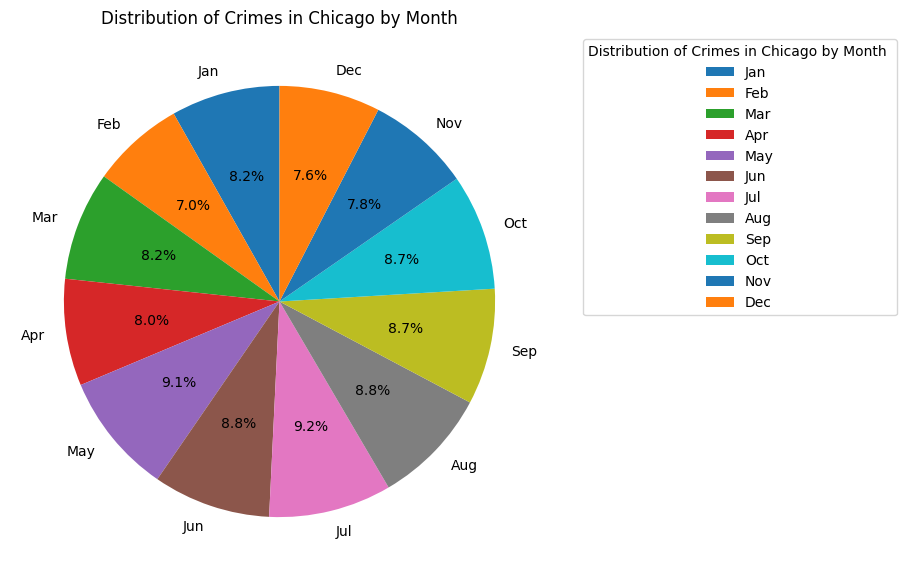

In [45]:
monthly_crimes = crime['Month'].value_counts().sort_index()

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(7,7))
plt.pie(monthly_crimes, labels=months, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Crimes in Chicago by Month")
plt.legend(title='Distribution of Crimes in Chicago by Month ', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The data shows us the results of monthly crimes that happened in Chicago. The highest crime percentage occurred in July at 9.2%. Following that, May had a percentage of 9.1%, while June and August both recorded 8.8%. September and October each had a percentage of 8.7%. March reported 8.2%, and April and January both had 8.0%. November's percentage was 7.8%, followed by December at 7.6%. Finally, February had the lowest percentage at 7.0%.

<hr>
<h2><b>QUESTION #6</b></h2>

<h2><b>Which of the five crime locations shows the largest percentage change in the number of crimes between January and February?</b></h2>
<hr>

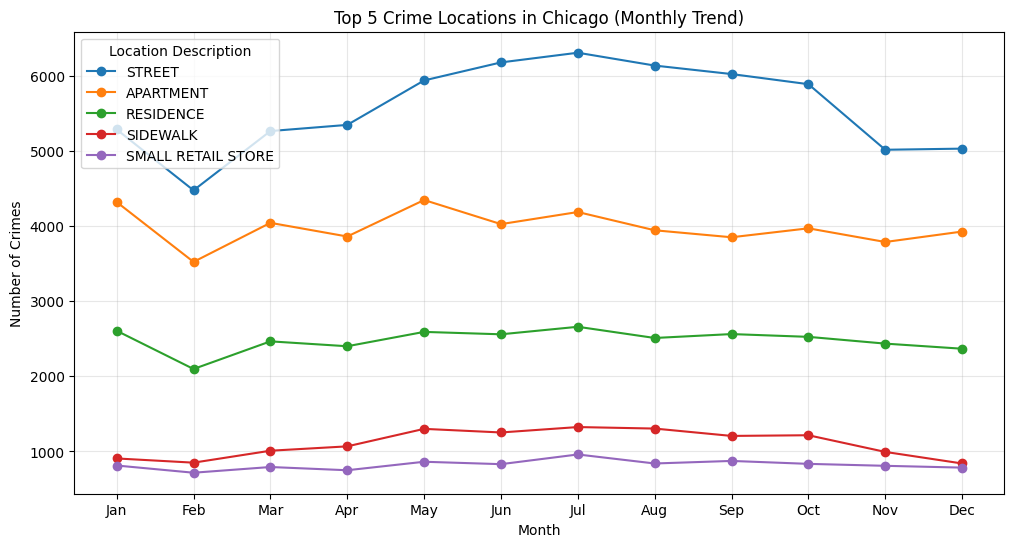

In [46]:
location_trend = crime.groupby(['Month','Location Description']).size().unstack(fill_value=0)
top_locations = location_trend.sum().sort_values(ascending=False).head(5).index
location_trend[top_locations].plot(
    marker='o',
    figsize=(12,6),
    title="Top 5 Crime Locations in Chicago (Monthly Trend)"
)

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(ticks=range(1,13), labels=months)
plt.ylabel("Number of Crimes")
plt.xlabel("Month")
plt.grid(alpha=0.3)
plt.show()

<h3><b>INSIGHTS:</b> </h3>

There appears to be a general positive correlation between the summer months on May through August and the number of crimes for the top four categories, particularly for Street and Apartment, which peak during this time. Conversely, the "SMALL RETAIL STORE" category seems to be least affected by seasonal changes in comparison, maintaining a relatively low and stable crime count.

<hr>
<h2><b>QUESTION #7</b></h2>

<h2><b>Which of the given categories has the highest or lowest results regarding arrests and non-arrests days of week? </b></h2>
<hr>

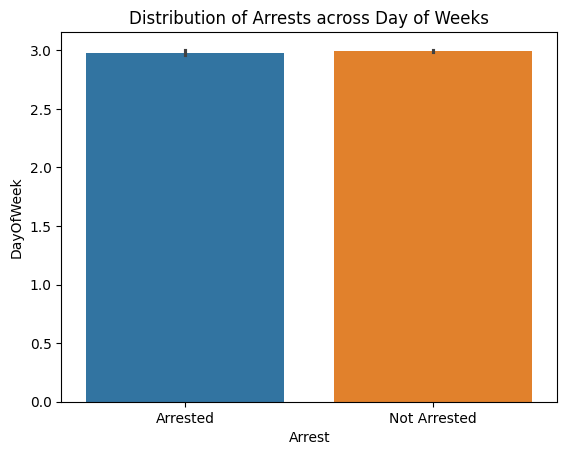

<Figure size 1200x600 with 0 Axes>

In [47]:
sns.barplot(
    data=crime, 
    x='Arrest', 
    y='DayOfWeek', 
    hue='Arrest'
)
# DayOfWeek = ['0.0'Monday', 0.5: 'Tuesday',1.0: 'Wednesday',1.5: 'Thursday', 2.0: 'Friday',2.5: 'Saturday', 3.0: 'Sunday']

plt.xlabel("Arrest")
plt.ylabel("DayOfWeek")
plt.title("Distribution of Arrests across Day of Weeks")
plt.figure(figsize=(12,6))
plt.show()

<h3><b>INSIGHTS:</b> </h3>

This data treating Monday crimes and Sunday crimes equally in terms of an arrest resulting. It shows us that the service of the police on chicago was fair in society if you do something bad then you will be arrested.

<hr>
<h2><b>QUESTION #8</b></h2>

<h2><b>Which among the month has deal with the most lowest on year 2024 and on year 2025?</b></h2>
<hr>

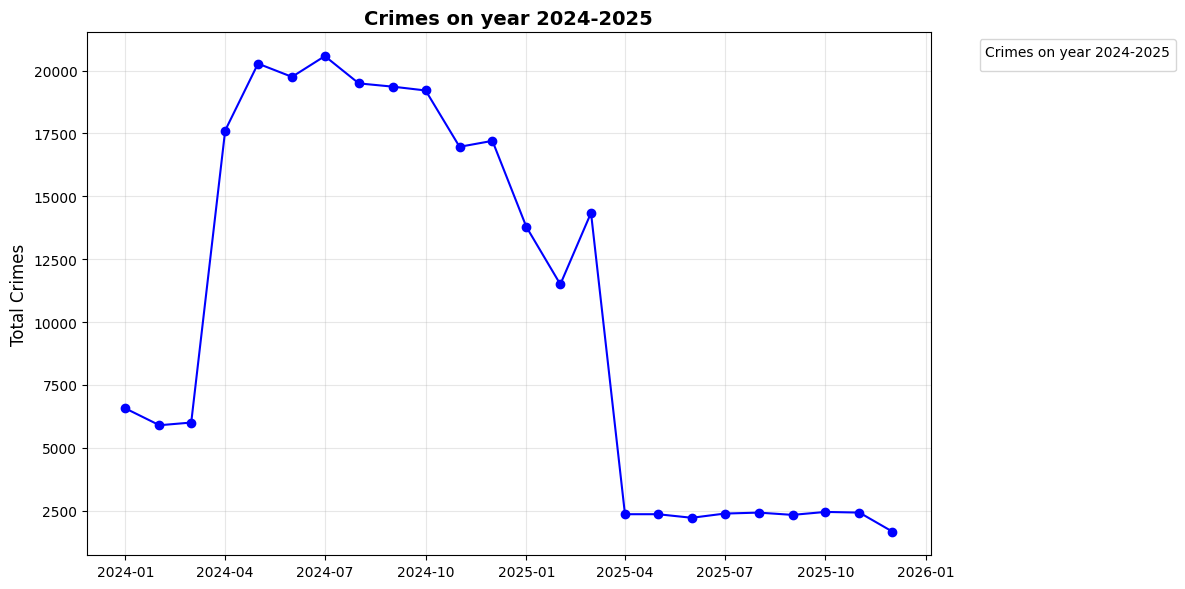

In [48]:
date_des = (
    crime.groupby(crime['Date'].dt.to_period("M"))
    .size()
    .to_timestamp()
)

plt.figure(figsize=(12,6))
plt.plot(date_des.index, date_des.values, marker='o', linestyle='-', color='b')
plt.title("Crimes on year 2024-2025", fontsize=14, fontweight='bold')
plt.ylabel("Crimes of 2024-2025 Records (Monthly)", fontsize=12)
plt.ylabel("Total Crimes", fontsize=12)
plt.legend(title='Crimes on year 2024-2025', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<hr>
<h3><b>INSIGHTS:</b> </h3>

Based on the line plot, in the year 2024, there were a total of 6,500 reported crimes. In contrast, the lowest crime count during the entire two-year period occurred in December 2025, with only about 1,500 incidents.

<hr>
<h2><b>QUESTION #9</b></h2>

<h2><b>What are the three most common types of crimes that occur on Chicago's streets and public ways?</b></h2>
<hr>

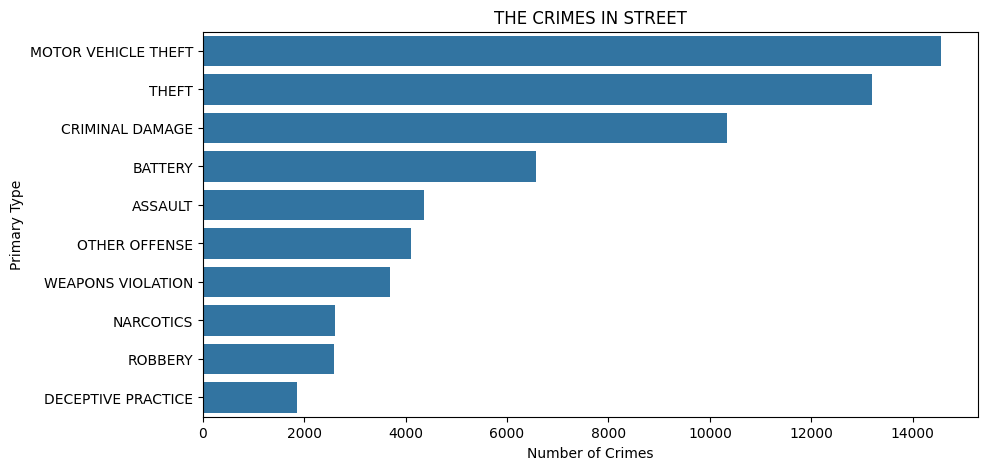

In [49]:
street_crimes = crime[crime['Location Description'] == 'STREET']['Primary Type'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=street_crimes.values, y=street_crimes.index) 
plt.title("THE CRIMES IN STREET")
plt.xlabel("Number of Crimes")
plt.xlabel("Number of Crimes")
plt.show() 

<h3><b>INSIGHTS:</b> </h3>

Motor vehicle theft, theft, and criminal damage are the three most common crimes that occur on Public Streets or in Public Places. Since these three crimes together account for a far higher number of incidents more than 37,500 total than any other category, security interventions in public areas should give priority to measures that safeguard both personal property and vehicles.

<hr>
<h2><b>QUESTION #10</b></h2>

<h2><b>What are the three least common types of crimes that occur on Chicago's in an Residence?</b></h2>
<hr>

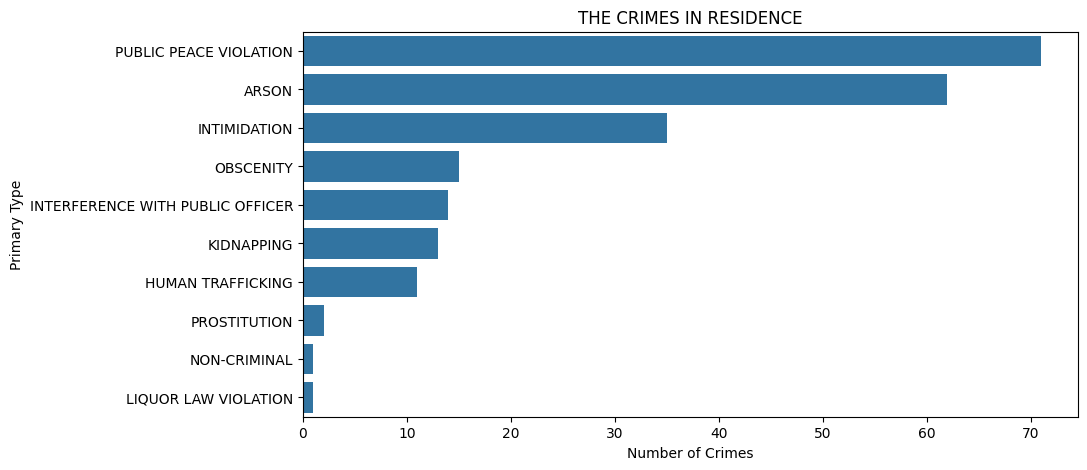

In [50]:
street_crimes = crime[crime['Location Description'] == 'RESIDENCE']['Primary Type'].value_counts().tail(10)

plt.figure(figsize=(10,5))
sns.barplot(x=street_crimes.values, y=street_crimes.index) 
plt.title("THE CRIMES IN RESIDENCE")
plt.xlabel("Number of Crimes")
plt.show() 

<h3><b>INSIGHTS:</b> </h3>

The least common crime type reported in a Residence is Liquor Law Violation, with only a handful of incidents (around 1-2). This finding is significant because it suggests that, of the crimes least likely to occur in a home, offenses involving the illegal sale or consumption of alcohol are practically non-existent compared to other low-frequency crimes like Non-Criminal or Prostitution (which have counts near 5 and 8, respectively).

<hr>
<h2><b>QUESTION #11</b></h2>

<h2><b>What are the arrest rates and describe the Primary Type that why they are being arrest or they are being free?</b></h2>
<hr>

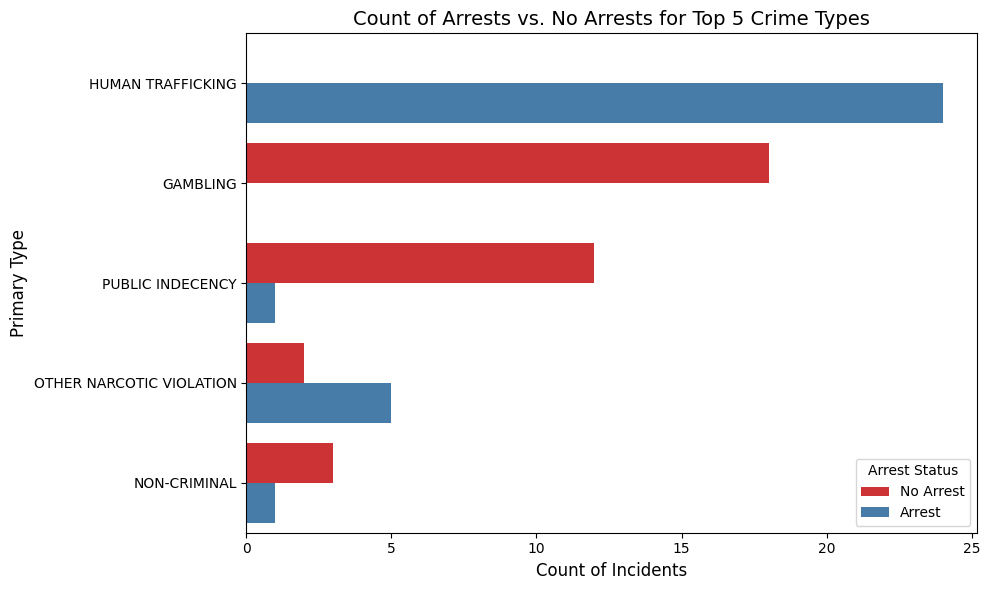

In [51]:
top_5_types = crime['Primary Type'].value_counts().tail(5).index
crime_subset = crime[crime['Primary Type'].isin(top_5_types)]

plt.figure(figsize=(10, 6))
# Order the categories by the count
order = crime_subset['Primary Type'].value_counts().index
sns.countplot(
    y='Primary Type',
    hue='Arrest',
    data=crime_subset,
    order=order,
    palette='Set1'
)
plt.title('Count of Arrests vs. No Arrests for Top 5 Crime Types', fontsize=14)
plt.xlabel('Count of Incidents', fontsize=12)
plt.ylabel('Primary Type', fontsize=12)
plt.legend(title='Arrest Status', labels=['No Arrest', 'Arrest'])
plt.tight_layout()
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The arrest rates for particular crime categories provide the most startling insight was Human trafficking has almost 100% arrest rates, while gambling has the lowest arrest effectiveness, with almost 90% of incidents ending in no arrests. This implies that police response or case solvability varies significantly depending on the type of crime, with very low success rates for crimes that are frequently regarded as victimless or hard to prove on the street.

<hr>
<h2><b>QUESTION #12</b></h2>

<h2><b>Which among the Blocks are the most affected on the crime/incidents that happens?</b></h2>
<hr>

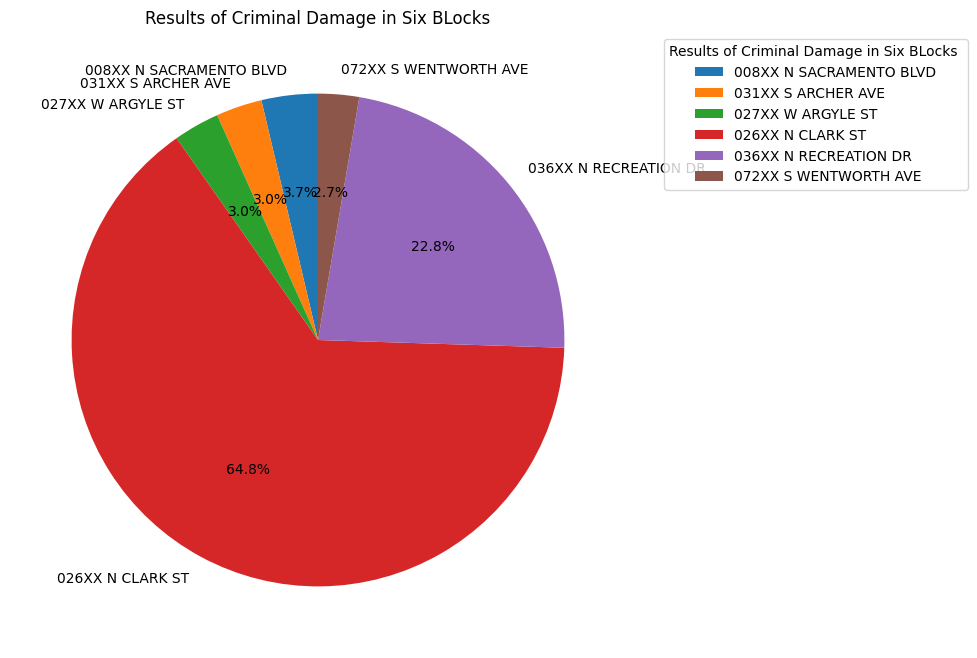

In [52]:
criminal_crimes = crime[crime['Primary Type'] == 'CRIMINAL DAMAGE']

criminal_counts = crime.groupby("Block").size().loc[
    ["008XX N SACRAMENTO BLVD", "031XX S ARCHER AVE", "027XX W ARGYLE ST", "026XX N CLARK ST", "036XX N RECREATION DR", "072XX S WENTWORTH AVE"]
]
plt.figure(figsize=(8,8))
plt.pie(criminal_counts, labels=criminal_counts.index, autopct='%1.1f%%', startangle=90,)
plt.title("Results of Criminal Damage in Six BLocks")
plt.legend(title='Results of Criminal Damage in Six BLocks ', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


<h3><b>INSIGHTS:</b> </h3>

The most significant finding is the extreme concentration of crime in one area: out of the six blocks examined, the 026XX N CLARK ST block accounts for almost two thirds of all incidents and has a dominant 64.8% of criminal damage. 

<hr>
<h2><b>QUESTION #13</b></h2>

<h2><b>What is the overall percentage of reported crimes that successfully result in an arrest, and what percentage of incidents do not lead to an arrest?</b></h2>
<hr>

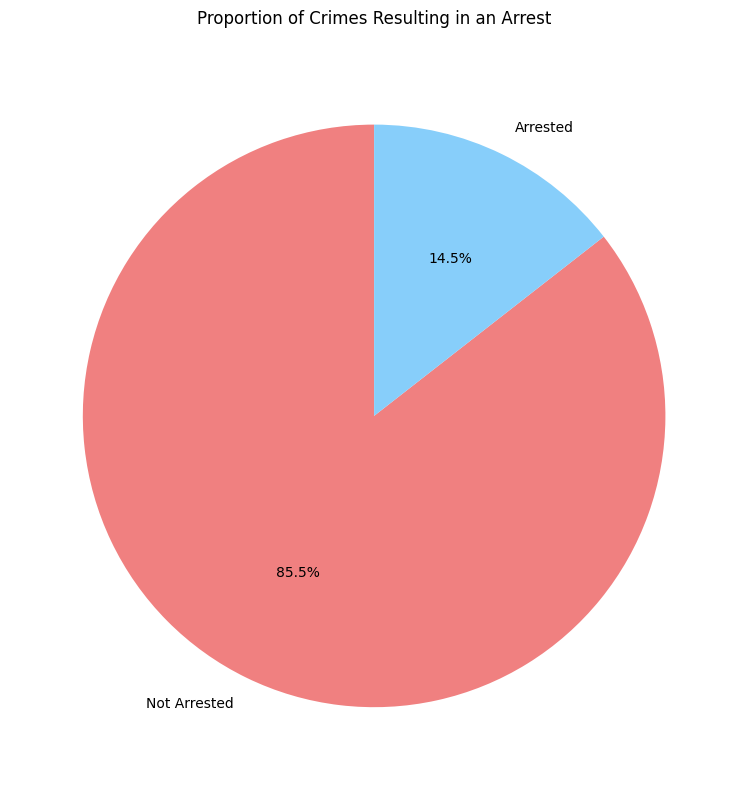

In [53]:
arrest_counts = crime['Arrest'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(arrest_counts, labels=arrest_counts.index, autopct='%1.1f%%', startangle=90,colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Crimes Resulting in an Arrest', pad=20)
plt.tight_layout()


<h3><b>INSIGHTS:</b> </h3>

According to the data, there is a low overall clearance rate in Chicago, as the great majority of reported crimes do not lead to an arrest. Just 14.5% of crimes are successfully closed with an arrest, while an astounding 85.5% of all incidents are classified as "Not Arrested."

<hr>
<h2><b>QUESTION #14</b></h2>

<h2><b>Which three police districts show the highest total volume of reported crime, and which district exhibits the most significant difference between the total count of 'Arrested' vs. 'Not Arrested' incidents?</b></h2>
<hr>

<Axes: xlabel='District', ylabel='Count'>

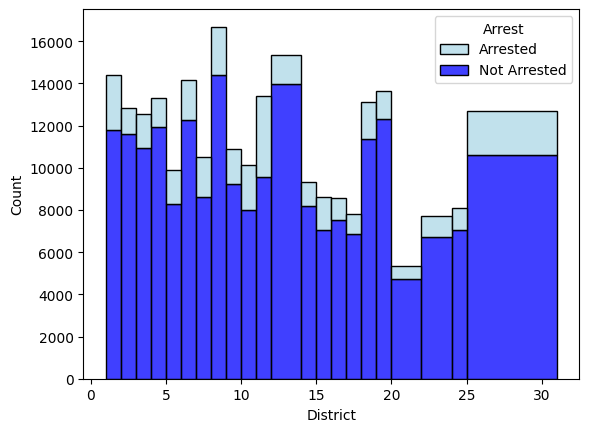

In [54]:
sns.histplot(
    data=crime,
    x='District',
    hue='Arrest',
    multiple='stack',
    bins=sorted(crime['District'].unique()),
    kde=False,
    # Use the new descriptive names in the palette
    palette={'Arrested': 'lightblue', 'Not Arrested': 'blue'}
)


<h3><b>INSIGHTS:</b> </h3>

The highest overall crime volume is heavily concentrated in Districts 1, 3, and 11, with District 11 showing the highest total count. However, District 31 has the most notable arrest disparity,it is among the highest-volume districts but has a proportionally much larger "Not Arrested" count (the dark blue bar) relative to its total, suggesting a particularly low overall clearance rate.

<hr>
<h2><b>QUESTION #15<b></h2>

<h2><b>Are there geographic clusters of Crime, and is Crime related to latitude and longitude?
</b></h2>
<hr>

In [55]:
lat = crime['Latitude'].corr(crime['ID'])
lon = crime['Longitude'].corr(crime['ID'])
print(f"Correlation Latitude vs. Crime: {lat:.3f}")
print(f"Correlation Longitude vs. Crime: {lon:.3f}")

Correlation Latitude vs. Crime: 0.018
Correlation Longitude vs. Crime: -0.005


<h3><b>INSIGHTS:</b> </h3>

Latitude and crime do not correlate linearly. Moving north or south has virtually no impact on the particular crime metric under study, which is most likely a crime count or rate, according to this near-zero value.

<hr>
<h2><b>QUESTION #16</b></h2>

<h2><b>Define the Distribitbution among weeks and also include the percentage of crime?</b></h2>
<hr>

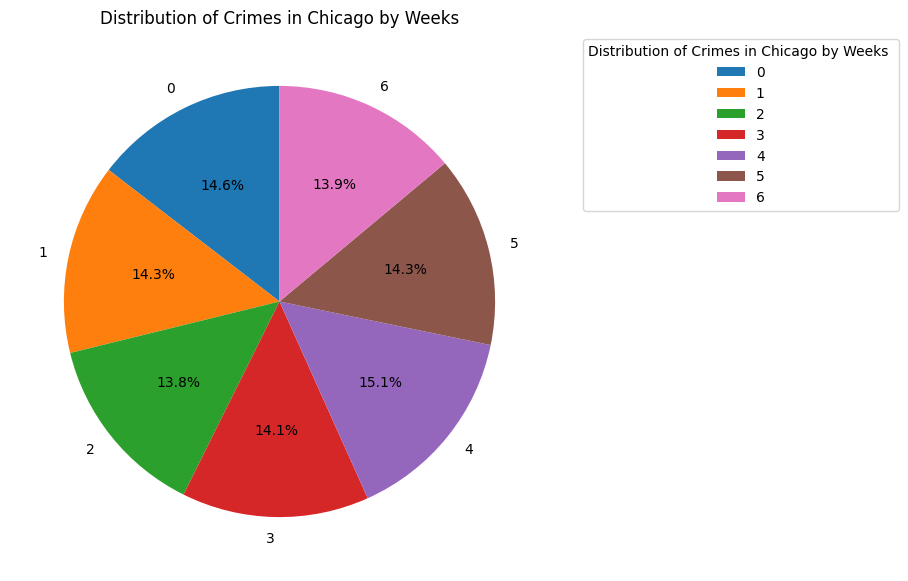

In [56]:
week_crimes = crime['DayOfWeek'].value_counts().sort_index()
weeks = {0: 'Monday',1: 'Tuesday', 2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
plt.figure(figsize=(7,7))
plt.pie(week_crimes, labels=weeks, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Crimes in Chicago by Weeks")
plt.legend(title='Distribution of Crimes in Chicago by Weeks ', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The data shows us the results of Distribution that happened in Chicago by Weeks. The highest crime percentage occurred in april at 15.1%. Following that, Monday had a percentage of 14.6%, while Tuesday and Saturday both recorded 14.3%. Thursday had a percentage of 14.1%. Sunday reported 13.9% and   Finally, Wendsday had the lowest percentage at 13.8%. 

<hr>
<h2>QUESTION #17</h2>

<h2><b>What is the clearance rate for these crimes compared to the national average? Are the rates shown here indicative of an effective or an under-resourced policing strategy in Chicago?</b></h2>
<hr>

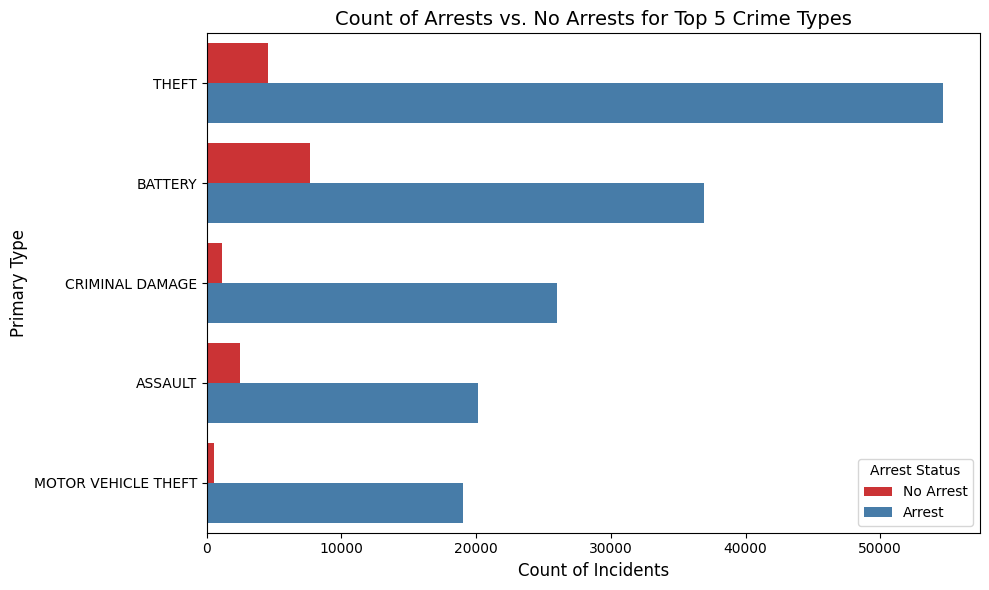

In [57]:
top_5_types = crime['Primary Type'].value_counts().head(5).index
crime_subset = crime[crime['Primary Type'].isin(top_5_types)]

plt.figure(figsize=(10, 6))
# Order the categories by the count
order = crime_subset['Primary Type'].value_counts().index
sns.countplot(
    y='Primary Type',
    hue='Arrest',
    data=crime_subset,
    order=order,
    palette='Set1'
)
plt.title('Count of Arrests vs. No Arrests for Top 5 Crime Types', fontsize=14)
plt.xlabel('Count of Incidents', fontsize=12)
plt.ylabel('Primary Type', fontsize=12)
plt.legend(title='Arrest Status', labels=['No Arrest', 'Arrest'])
plt.tight_layout()
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The Chicago crime data reveals a critical disparity in police effectiveness based on crime type. Arrest rates are extremely low for high-volume property crimes like theft and motor vehicle theft, a trend consistent with poor single-digit clearance rates nationally. In contrast, violent crimes such as battery and assault show a proportionally higher arrest rate, suggesting police are more successful in resolving crimes against persons. Overall, the large number of "No Arrest" incidents in every major category points to a low overall case clearance rate, signaling a significant failure in the city's policing effectiveness, which undermines public safety and trust.

<hr>
<h2><b>QUESTION #18</b></h2>

<h2><b>Why does FBI Code 09 (Motor Vehicle Theft) have a substantially higher proportion of arrested cases (light blue) compared to other high-volume property crimes like Code 07 (Theft), and does this difference relate to easier tracing of vehicles than general stolen items??</b></h2>
<hr>

<Axes: xlabel='Count', ylabel='FBI Code'>

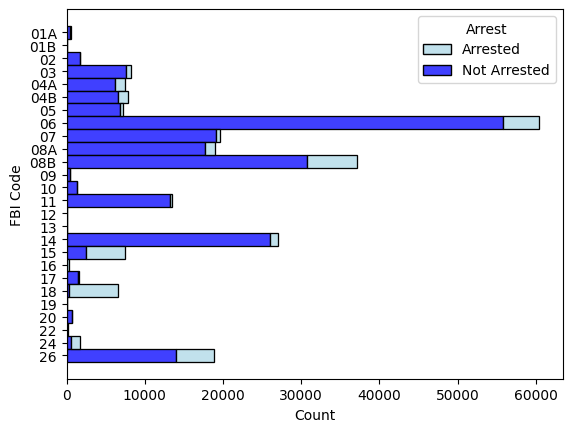

In [58]:
sns.histplot(
    data=crime,
    y='FBI Code',
    hue='Arrest',
    multiple='stack',
    bins=sorted(crime['FBI Code'].unique()),
    kde=False,
    # Use the new descriptive names in the palette
    palette={'Arrested': 'lightblue', 'Not Arrested': 'blue'}
)

<h3><b>INSIGHTS:</b> </h3>

FBI Code 07 (Theft/Larceny) clearly has the highest volume of reported incidents, but the massive length of the "Not Arrested" (dark blue) bar dramatically demonstrates that only a negligible percentage of these property crimes are solved by an arrest. This signifies an overwhelming lack of clearance for the most common criminal offenses.

<hr>
<h2><b>QUESTION #19</b></h2>

<h2><b>Are there geographic clusters of Crime, and is Crime related to latitude and longitude?
</b></h2>
<hr>

In [59]:
x = crime['X Coordinate'].corr(crime['Beat'])
y = crime['Y Coordinate'].corr(crime['Beat'])
print(f"Correlation x Coordinate vs. Crime: {x:.3f}")
print(f"Correlation y coordinate vs. Crime: {y:.3f}")

Correlation x Coordinate vs. Crime: -0.541
Correlation y coordinate vs. Crime: 0.633


<h3><b>INSIGHTS:</b> </h3>

X and Y Coordinate and crime do not correlate linearly. Moving north or south has virtually no impact on the particular crime metric under study, which is most likely a crime count or rate, according to this near-zero value.

<hr>
<h2><b>QUESTION #20</b></h2>

<h2><b>Do locations with more accidents also tend to have more crime on average?</b></h2>
<hr>

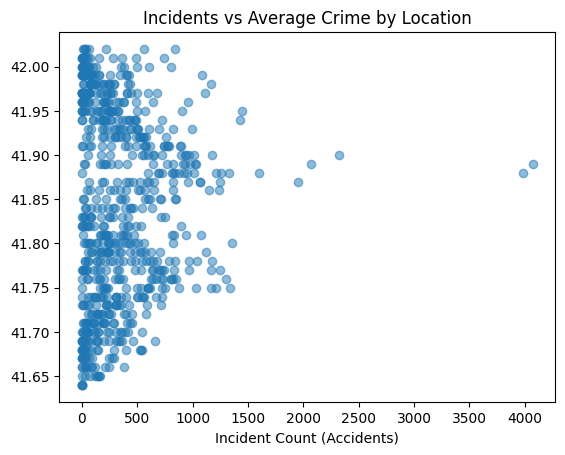

In [60]:
cluster_stats = crime.groupby([crime['Latitude'].round(2), crime['Longitude'].round(2)])
counts = cluster_stats['ID'].count()
casualties = counts.index.get_level_values(0) 

plt.scatter(counts, casualties, alpha=0.5)
plt.title('Incidents vs Average Crime by Location')
plt.xlabel('Incident Count (Accidents)')
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The scatter plot does not show a strong positive correlation between the Incident Count (Accidents) on the x-axis and the Average Crime by Location on the y-axis (represented by Latitude). The data points are highly dispersed vertically across all accident counts, indicating that a high number of accidents does not reliably predict a high or low average crime rate.

<hr>
<h2><b>QUESTION #21</b></h2>

<h2><b>Top 10 Wards by Crime Count, which ward has the highest number of reported crimes, and what immediate, high-level action might a city council or police department consider for that specific area?</b></h2>
<hr>

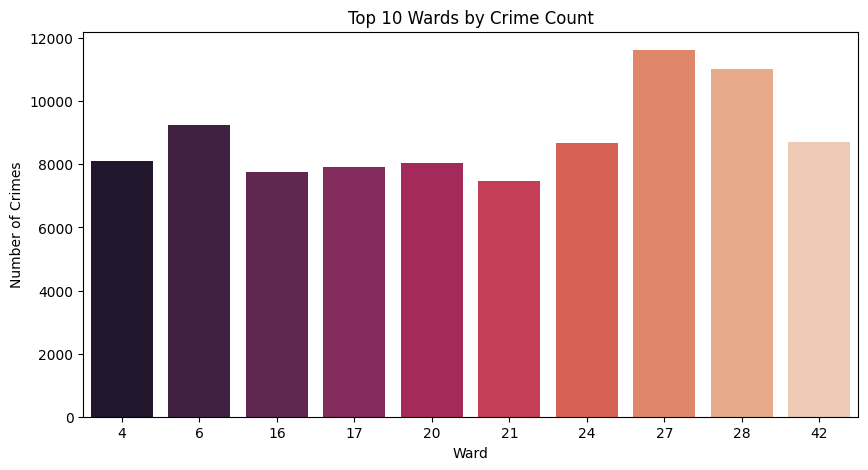

In [61]:
ward_crimes = crime.groupby('Ward').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=ward_crimes.index, y=ward_crimes.values, palette="rocket")
plt.title("Top 10 Wards by Crime Count")
plt.xlabel("Ward")
plt.ylabel("Number of Crimes")
plt.show()

<h3><b>INSIGHTS:</b> </h3>

Based on the provided bar chart Ward 27 has the highest crime count, approaching 12,000 crimes.The remaining wards in the top 10 cluster mostly between 7,500 and 9,500 crimes, suggesting Ward 27 is a significant outlier that may require an immediate, focused resource allocation review, such as increasing police presence or launching targeted community safety programs.
 

<hr>
<h2><b>QUESTION #22</b></h2>

<h2><b>What is the most prevalent summer crime type (June-August), and how much more frequent is it compared to the second and third most common crimes?</b></h2>
<hr>

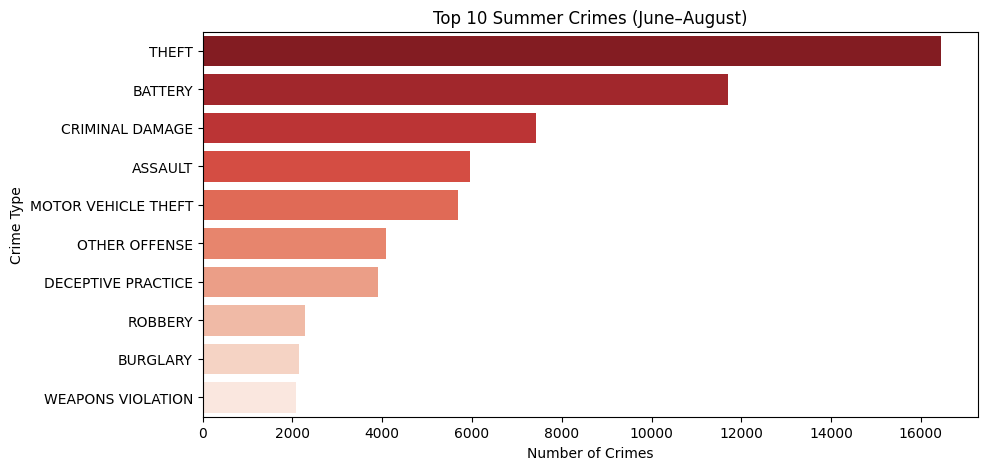

In [62]:
summer_crimes = crime[crime['Month'].isin([6,7,8])].groupby('Primary Type').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=summer_crimes.values, y=summer_crimes.index, palette="Reds_r")
plt.title("Top 10 Summer Crimes (June–August)")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The offense that occurs most frequently during the summer months (June to August) is theft, which accounts for over 16,000 incidents overall. The frequency of theft is significantly higher than that of the next two types of crimes: It is about 4,000 times more frequent than battery, which is the second most common crime with about 12,000 incidents, and it is about 9,000 times more frequent than criminal damage, which is the third most common crime with about around 7,500 incidents.

<hr>
<h2><b>QUESTION #23</b></h2>

<h2><b>Which among the categories of crimes in arrested and not arrested on Illegal use cash card has the highest number of records and the lowest number of records?</b></h2>
<hr>

Arrest,Arrested,Not Arrested
Month,,
1,0,125
2,0,115
3,0,120
4,0,109
5,0,110
6,0,126
7,0,113
8,0,101
9,0,74


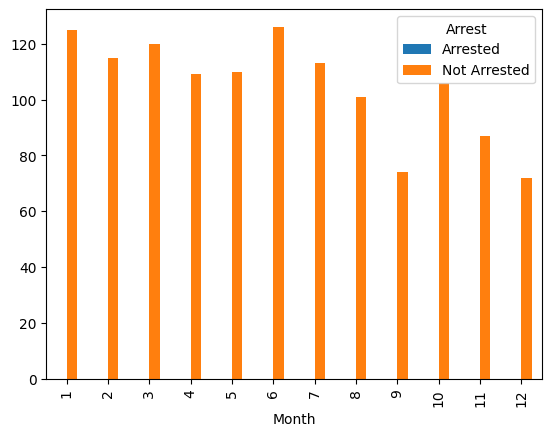

In [63]:
desc = crime[crime['Description'] == "ILLEGAL USE CASH CARD"].groupby(['Month','Arrest']).size().unstack()
desc.plot(kind='bar')
desc

<h3><b>INSIGHTS:</b> </h3>

Based on the given results,the arrrested on january to December has no number of records and on the not arrested has many number of records. So that it means there is no people who are using illegal use of cash card.On this the most highest number of records in using illegal cash card in paying was on the month of june total of 126 people then on the lowest number of records was on the month of december.

<hr>
<h2><b>QUESTION #24</b></h2>

<h2><b>Since the biggest problems in alleys and parking lots are property crimes like Theft, Criminal Damage, and Motor Vehicle Theft, what are the most effective, basic changes (like better lights, cameras, or fences) that could be used to stop these specific crimes?</b></h2>
<hr>

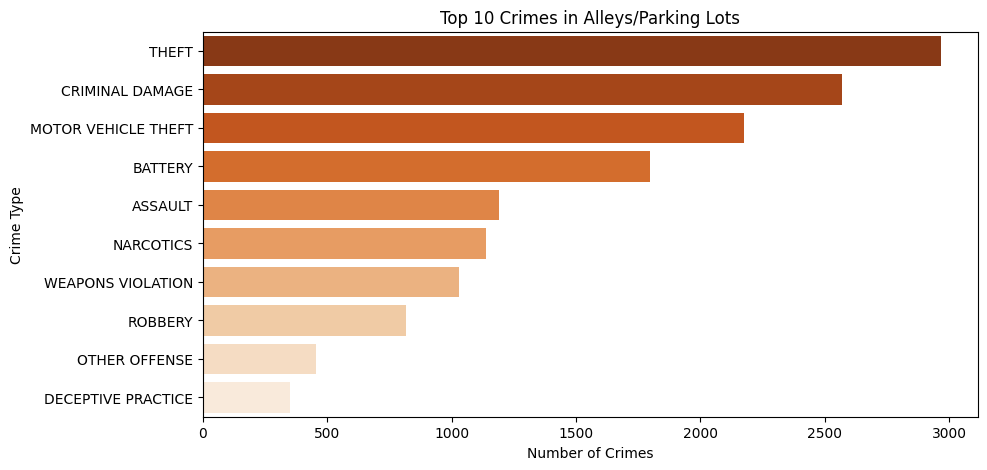

In [64]:
alley_crimes = crime[crime['Location Description'].str.contains("ALLEY|PARKING LOT", na=False)].groupby('Primary Type').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=alley_crimes.values, y=alley_crimes.index, palette="Oranges_r")
plt.title("Top 10 Crimes in Alleys/Parking Lots")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<h3><b>INSIGHTS:</b> </h3>

Based on the analysis, It highlights the dominant category of crime (property crime) in these specific locations.It uses the absolute numbers (e.g., over 3,000 for Theft) to emphasize the severity of the problem.It connects the data directly to actionable preventative strategies (lighting, surveillance, barriers) relevant to the nature of the locations (alleys/parking lots) and the crimes (Theft, Criminal Damage, Motor Vehicle Theft).It prompts an analysis of resource allocation based on the frequency of the most common offenses.

<hr>
<h2><b>QUESTION #25</b></h2>

<h2><b>What is the monthly percentage of arrests (Arrested / (Arrested + Not Arrested)) for "AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON," and which month had the highest arrest rate??</b></h2>
<hr>

Arrest,Arrested,Not Arrested
Month,,
1,13,57
2,13,60
3,11,61
4,23,52
5,19,78
6,13,78
7,11,80
8,18,65
9,21,89


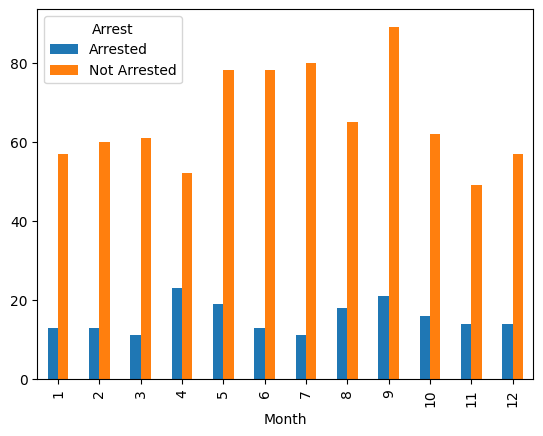

In [65]:
descr = crime[crime['Description'] == "AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON"].groupby(['Month','Arrest']).size().unstack()
descr.plot(kind='bar')
descr

<h3><b>INSIGHTS:</b> </h3>

Across all 12 months, the number of cases labeled "Not Arrested" (orange bars) is significantly higher than the number of cases labeled "Arrested" (blue bars), typically by a factor of three to six. This is the most important finding: for the crime of "AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON," the vast majority of incidents do not result in an arrest in the same month. In Month 10, for instance, there were 62 non-arrested cases and only 16 arrests. This implies that there is now a consistently low rate of on-site or prompt arrests for this particular and serious crime.

<hr>
<h2><b>QUESTION #26</b></h2>

<h2><b>Is there a correlation between the frequency of traffic accidents at a location and the average severity of crime at that same location (as proxied by the crime's Cluster Latitude/IUCR value)?</b></h2>
<hr>

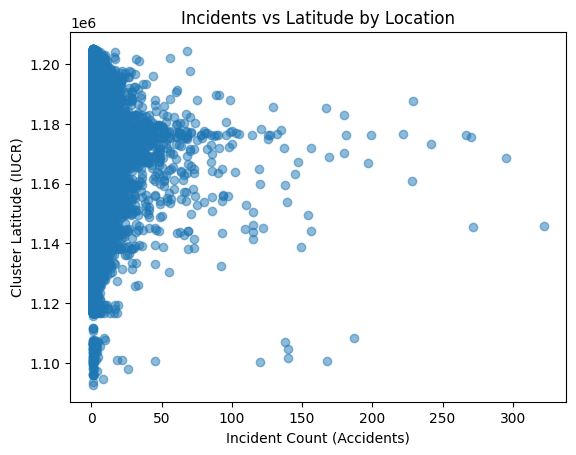

In [66]:
cluster_stats = crime.groupby([crime['X Coordinate'].round(2), crime['Y Coordinate'].round(2)])
counts = cluster_stats['IUCR'].count()
casualties = counts.index.get_level_values(0) 

plt.scatter(counts, casualties, alpha=0.5)
plt.title('Incidents vs Latitude by Location')
plt.xlabel('Incident Count (Accidents)')
plt.ylabel('Cluster Latitude (IUCR)')
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The scatter plot shows no clear correlation between the number of accidents (Incident Count on the x-axis) and the Cluster Latitude/IUCR (a proxy for the type or severity of crime on the y-axis) at a given location.Most locations have a very low accident count (below 50), but these locations span the entire range of crime latitude/IUCR values. This means locations with few accidents can have crimes with low or high IUCR values (e.g., all the points clustered near x=0).Locations with a high accident count (e.g., over 100) are rare and also do not consistently trend toward higher or lower crime latitude/IUCR values.The overwhelming concentration of data points in the bottom-left corner and the vertical spread across all accident counts suggests that the frequency of traffic accidents does not appear to be a good predictor of the average crime type/severity at that specific location.

<hr>
<h2><b>QUESTION #27</b></h2>

<h2><b>In Block - 005XX W NORTH AVE identify which of the primary type has the highest number of records and the lowest records?</b></h2>
<hr>

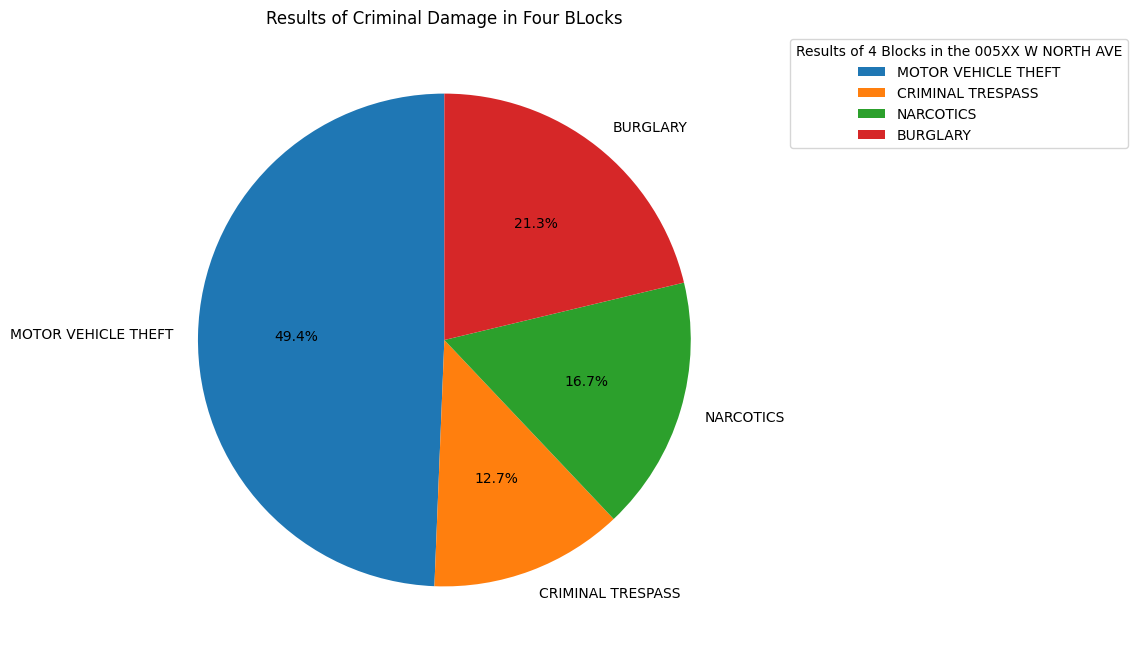

In [67]:
block_crimes = crime[crime['Block'] == '005XX W NORTH AVE']

block_counts = crime.groupby("Primary Type").size().loc[
    ["MOTOR VEHICLE THEFT", "CRIMINAL TRESPASS", "NARCOTICS", "BURGLARY"]
]
plt.figure(figsize=(8,8))
plt.pie(block_counts, labels=block_counts.index, autopct='%1.1f%%', startangle=90,)
plt.title("Results of Criminal Damage in Four BLocks")
plt.legend(title='Results of 4 Blocks in the 005XX W NORTH AVE', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The data shows us the results of Criminal Damage that happened in Chicago on 4 Blocks (MOTOR VEHICLE THEFT, CRIMINAL TRESPASS, NARCOTICS, BURGLARY). The highest criminal dmaage percentage occurred in motor vehicle theft at 49.4%. Following that, Burglary had a percentage of 21.3%, while Narcotics  recorded 16.7%.Finally, Criminal Trespass had a lowest percentage of 12.7%.

<hr>
<h2><b>QUESTION #28</b></h2>

<h2><b>How does the crime count in the single highest-ranking Beat (1834) compare to the count in the second-highest Beat (123), and what does this difference suggest about resource allocation??</b></h2>
<hr>

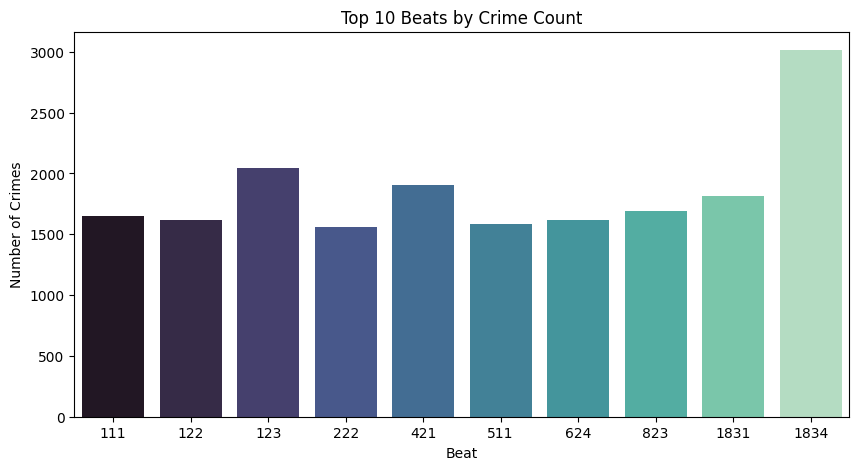

In [68]:
beat_counts = crime.groupby('Beat').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=beat_counts.index, y=beat_counts.values, palette="mako")
plt.title("Top 10 Beats by Crime Count")
plt.xlabel("Beat")
plt.ylabel("Number of Crimes")
plt.show()

<h3><b>INSIGHTS:</b> </h3>

The crime rate for Beat 1834 is roughly 3,050 (the highest bar).Beat 1834 has around 50% more crimes than the next busiest beat, with a count of about 2,050 compared to the second-highest Beat (123) with a differential of about 1,000 offenses.  Beat 1834 is a critical hotspot due to the high volume of crime there, necessitating an examination of the factors that contribute to the markedly elevated crime rate.  According to this statistics, Beat 1834 should be given top priority in any plan for allocating resources or reducing crime (such as by implementing more patrols or community initiatives) in order to have the greatest possible influence on the overall crime rate.

<hr>
<h2><b>QUESTION #29</b></h2>

<h2><b>Do the geographic coordinates (X and Y) strongly predict the police District ID, and what does the high correlation coefficient with the Y Coordinate (Latitude) suggest about the district boundaries?</b></h2>
<hr>

In [69]:
x = crime['X Coordinate'].corr(crime['District'])
y = crime['Y Coordinate'].corr(crime['District'])
print(f"Correlation x Coordinate vs. District: {x:.3f}")
print(f"Correlation y coordinate vs. District: {y:.3f}")

Correlation x Coordinate vs. District: -0.543
Correlation y coordinate vs. District: 0.634


<h3><b>INSIGHTS:</b> </h3>

The data shows a very strong correlation between the Y Coordinate (Latitude/North-South position) and the District ID (r=0.634), but a weaker, moderate correlation with the X Coordinate (Longitude/East-West position) (r=−0.543).

<h2>QUESTION #30</h2>

<h2><b>How did the total number of "Aggravated Knife / Cutting Instrument" crimes change over the 12 years shown, and what was the approximate overall arrest rate for these crimes during that period?</b></h2>
<hr>

Arrest,Arrested,Not Arrested
Year,,
1,31,144
2,41,125
3,51,159
4,42,199
5,64,167
6,50,188
7,44,173
8,44,175
9,46,159


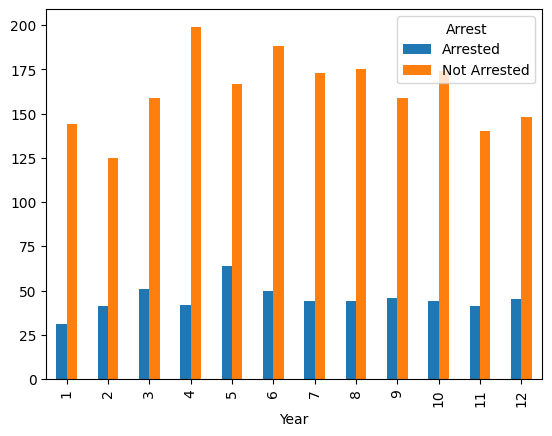

In [70]:
describe = crime[crime['Description'] == "AGGRAVATED - KNIFE / CUTTING INSTRUMENT"].groupby(['Year','Arrest']).size().unstack()
describe.plot(kind='bar')
describe

<h3><b>INSIGHTS:</b> </h3>

The data reveals that across the entire 12-year period, the overwhelming majority of cases did not lead to an arrest.While the total count of these crimes remains consistently high, the ability of law enforcement to close these cases by making an arrest is generally low. The arrest rate itself saw some fluctuations over the years, reaching a peak around the middle of the period before generally declining again, indicating a persistent and significant challenge in solving this type of violent crime.

<h2>QUESTION #31</h2>

<h2><b> PRIMARYT TYPE - NARCOTICS IN BLOCK</b></h2>
<hr>

In [71]:
narcotics_crime = crime[crime['Primary Type']== 'NARCOTICS']

In [72]:
nar_crimes= crime[crime['Primary Type'] == 'NARCOTICS']
nar_block = nar_crimes['Block'].value_counts()
print("Narcotice Crime by Block:")
print(nar_block)

mapsie = folium.Map(location=[41.869820436, -87.695993967], zoom_start=10)
HeatMap(nar_crimes[['Latitude', 'Longitude']].dropna(), radius=12).add_to(mapsie)
mapsie

Narcotice Crime by Block:
Block
007XX N LAWNDALE AVE    97
033XX W FILLMORE ST     88
049XX W HUBBARD ST      84
008XX N ST LOUIS AVE    83
034XX W CHICAGO AVE     76
                        ..
135XX S MACKINAW AVE     0
135XX S TORRENCE AVE     0
136XX S BUFFALO AVE      0
134XX S TORRENCE AVE     0
135XX S AVENUE K         0
Name: count, Length: 28716, dtype: int64


<h3><b>INSIGHTS:</b> </h3>

<b>PRIMARYT TYPE - NARCOTICS IN BLOCK</b>

Based on the given result, the 007XX N LAWNDALE AVE is the most highest place of records who are using narcotics with total of 97. Folloeing that is the 033XX W FILLMORE ST with a total of 88,while 049XX W HUBBARD ST with a total of 84. The 008XX N ST LOUIS AVE with a total of 83, and then the last was 034XX W CHICAGO AVE with a total of 76 has the lowest place using a narcotics drugs.



<h2>QUESTION #32</h2>

<h2><b>SEX OFFENSE CRIMES BY DISTRICT</b></h2>
<hr>

In [73]:
sex_crimes= crime[crime['Primary Type'] == 'SEX OFFENSE']
sex_block = sex_crimes['Block'].value_counts()
print("Sex Offense Crimes by district:")
print(sex_block)

mapsie = folium.Map(location=[41.939468093, -87.686972225], zoom_start=10)
HeatMap(sex_crimes[['Latitude', 'Longitude']].dropna(), radius=12).add_to(mapsie)
mapsie

Sex Offense Crimes by district:
Block
004XX S PLYMOUTH CT    7
004XX S STATE ST       4
046XX N BROADWAY       4
048XX N MARINE DR      4
013XX N HUDSON AVE     3
                      ..
0000X E 117TH ST       0
0000X E 118TH PL       0
0000X E 118TH ST       0
0000X E 119TH PL       0
0000X E 103RD ST       0
Name: count, Length: 28716, dtype: int64


<h3><b>INSIGHTS:</b> </h3>

<b>SEX OFFENSE CRIMES BY DISTRICT</b>

Based on the given result, the 004XX S PLYMOUTH CT is the place with the most reported sex offense crimes with a total of 7 incidents. Following that, three locations—004XX S STATE ST, 046XX N BROADWAY, and 048XX N MARINE DR—are tied for the second-highest count, each reporting a total of 4 incidents. The 013XX N HUDSON AVE block has the lowest count among the top five areas, with a total of 3 reported sex offense crimes.

<hr>
<h2><b>QUESTION #33</b></h2>

<h2><b>Accidents per district in vacation:</b></h2>
<hr>

In [74]:
vacation_data = crime[crime['Month'] == 4]
vacation_blocks = vacation_data['Block'].value_counts()
print("Accidents per district in vacation:")
print(vacation_blocks)

maps = folium.Map(location=[41.980779654, -87.65793708], zoom_start=8)
HeatMap(vacation_data[['Latitude', 'Longitude']].dropna(), radius=12).add_to(maps)
maps

Accidents per district in vacation:
Block
001XX N STATE ST        40
011XX S CANAL ST        38
0000X N STATE ST        36
0000X W TERMINAL ST     33
076XX S CICERO AVE      28
                        ..
047XX S AVERS AVE        0
047XX S BISHOP ST        0
026XX W CERMAK RD        0
0000X E 119TH PL         0
060XX S KILBOURN AVE     0
Name: count, Length: 28716, dtype: int64


<h3><b>INSIGHTS:</b> </h3>

<b>CRIME PER DISTRICT IN VACATION:</b>

The data highlights the top five locations for reported incident during vacation periods, showing a high concentration of incidents in the downtown and major thoroughfare areas.The intersection at 001XX N STATE ST recorded the highest number of accidents, with a total of 40.This is followed very closely by 011XX S CANAL ST, which reported 38 incident.Another section of the same street, 0000X N STATE ST, ranks third with 36 incident.0000X W TERMINAL ST is the fourth highest, reporting a total of 33 accidents.Finally, 076XX S CICERO AVE has the lowest count among the top five areas, with 28 reported accidents.The insight shows that the highest frequency of incident during vacation periods occurs at central, high-traffic downtown locations (State Street and Canal Street), suggesting that tourist activity and central commercial areas are particularly prone to incidents.



<hr>
<h2><b>QUESTION #34</b></h2>

<h2><b>ASSAULT ON DATE 03/13/2025 02:20:00 PM'</b></h2>
<hr>

In [75]:
crimesy_df = crime[crime['Date']== '03/13/2025 02:20:00 PM']

In [76]:
crimesy_date_df = crimesy_df[crimesy_df['Primary Type'] == 'ASSAULT']

locations = list(zip(crimesy_date_df['Latitude'], crimesy_date_df['Longitude']))
Crimesy_Map = folium.Map(location = [crimesy_date_df['Latitude'].mean(), crimesy_date_df['Longitude'].mean()], zoom_start=12)
HeatMap(locations).add_to(Crimesy_Map)
Crimesy_Map

<h3><b>INSIGHTS:</b> </h3>

<b>ASSAULT ON DATE 03/13/2025 02:20:00 PM</b>

The data higlights the only one assault that happened on March 3 2025 at 2:20 in the afternoon at the West Berteau Avenue. It also helps us on where can we going to find the particular problem on a world or on a particular place.

<hr>
<h2><b>QUESTION #35</b></h2>

<h2><b>IDENTIFYING HIGH-RISK AREAS FOR WEAPON VIOLATIONS</b></h2>
<hr>

In [77]:
prima_crimes = crime[crime['Primary Type'] == 'WEAPONS VIOLATION']
prima_blocks = prima_crimes['Block'].value_counts()
print("district in vacation:")
print(prima_blocks)

mapsay = folium.Map(location=[41.867868979,-87.627431787], zoom_start=8)
HeatMap(prima_crimes[['Latitude', 'Longitude']].dropna(), radius=12).add_to(mapsay)
mapsay

district in vacation:
Block
064XX S DR MARTIN LUTHER KING JR DR    25
001XX E SUPERIOR ST                    20
004XX N WABASH AVE                     16
0000X W TERMINAL ST                    14
057XX S CICERO AVE                     14
                                       ..
0000X E 113TH PL                        0
0000X E 112TH ST                        0
0000X E 112TH PL                        0
0000X E 111TH ST                        0
0000X E 110TH ST                        0
Name: count, Length: 28716, dtype: int64


<h3><b>INSIGHTS:</b> </h3>

<b>IDENTIFYING HIGH-RISK AREAS FOR WEAPON VIOLATIONS</b>

From the data, we can see that 064XX S DR MARTIN LUTHER KING JR DR recorded the highest number of weapon violation cases (25 cases) compared to other blocks. This suggests that this area may have a higher concentration of incidents, possibly due to factors such as population density, social activities, or lack of police visibility. Meanwhile, other areas like E 110TH ST and nearby blocks reported zero cases, which may indicate either better security measures, lower population activity, or fewer reported incidents.This distribution highlights the importance of focusing preventive measures and law enforcement patrols in areas with higher case counts to reduce the occurrence of weapon-related violations.
<hr>